# Ejemplos de uso del módulo tofsim

## Iniciar la sesión

Para iniciar la sesión, importamos el paquete o sólo el objeto `ToF`
Por ejemplo, en la forma:

In [ ]:
import tofsim
T = tofsim.ToF()

o, simplemente:

In [1]:
from tofsim import ToF
T = ToF()

El objeto del tipo `ToF` contiene toda la información sobre los parámetros de construcción y de funcionamiento

In [2]:
print ('Parámetros del TOF')
print (T.tof_parameters)
print ('Valor original: Vs =', T.Vs)
T.Vs = T.Vs /2.
print ('Valor cambiado: Vs =', T.Vs)
for k in T.tof_parameters:
  print ('{0} = {1}'.format(k, T.__dict__[k]))

Parámetros del TOF
['s', 'd', 'D', 'Vs', 'Vd', 'ds', 'dt', 't0', 'r0']
Valor original: Vs = 200.0
Valor cambiado: Vs = 100.0
s = 0.59
d = 1.3
D = 100.0
Vs = 100.0
Vd = 2000.0
ds = 0.03
dt = 0.008
t0 = 0.0
r0 = 1000.0


## Cálculos

Agregamos algunas sustancias a las cuales le vamos a simular las señales de tiempo de vuelo

In [3]:
T.add_substances('Li,H2O')

In [5]:
# Veamos que fragmentos hemos agregado:
print(T.fragments.to_text())


╒═════════════╤══════════════╤══════════╤══════════════╕
│ Sustancia   │ Fórmula      │     Masa │   Abundancia │
╞═════════════╪══════════════╪══════════╪══════════════╡
│ Li          │ 6Li^{0+}     │  6.01512 │     7.59     │
├─────────────┼──────────────┼──────────┼──────────────┤
│ Li          │ 7Li^{0+}     │  7.016   │    92.41     │
├─────────────┼──────────────┼──────────┼──────────────┤
│ H2O         │ 1H2-16O^{0+} │ 18.0106  │    99.7341   │
├─────────────┼──────────────┼──────────┼──────────────┤
│ H2O         │ 1H2-18O^{0+} │ 20.0148  │     0.204953 │
╘═════════════╧══════════════╧══════════╧══════════════╛


El método `ToF.signal()` devuelve la simulación de la señal que se observaría en el TOF.

In [6]:
s = T.signal()
print ('type(s):', type(s),'\n')
print ('keys:', s.keys())

type(s): <class 'dict'> 

keys: dict_keys(['signal', '6Li^{0+}', '7Li^{0+}', '1H2-16O^{0+}', '1H2-18O^{0+}', 'time'])


El resultado es un diccionario donde cada elemento es un array de datos:

 - s['time'] tiene el eje x, con la ventana de tiempo

 - s['signal'] tiene los valores de la suma de todas las especies.

 - los restantes elementos `s[sustancia]` tienen los valores de señal producida por cada sustancia.
 

In [7]:
# Cada elemento es un numpy array
print (type(s['signal']))

<class 'numpy.ndarray'>


Notar que en realidad no es necesario guardar el valor de `s` en este caso ya que queda guardado en el objeto `T.times`

In [10]:
T.times == s

True

## Gráficos

La manera más simple de graficar es utilizando el método  `make_plot`.

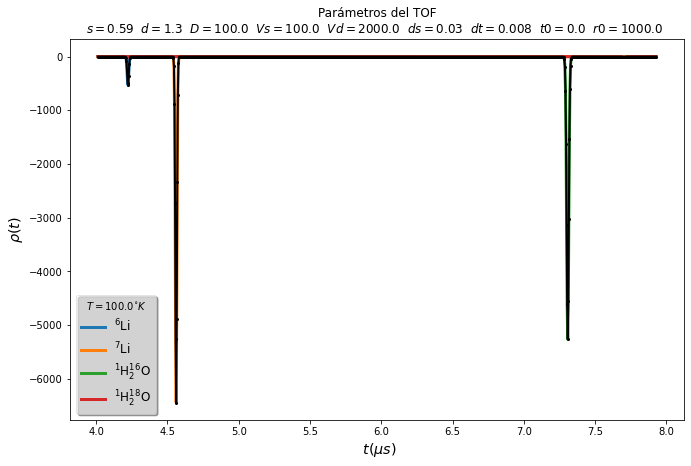

In [20]:
f = T.make_plot(T.fragments, negative=True, graph_all=True, hide_legend=False)

Este método ofrece algo de flexibilidad, pero dado que los datos se guardan como numpy arrays, se pueden graficar separadamente

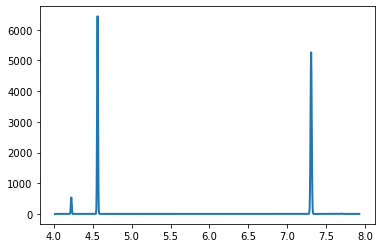

In [21]:
import matplotlib.pyplot as plt
x, y = T.times['time'], T.times['signal']
plt.plot(x, y)